# (Title)
### --- Authors

# Introduction- Overview

--- Fill here

# Business Problem

--- Fill Here

# Data Understanding

--- Fill info here
* Where did you get the data from?
http://www3.dsi.uminho.pt/pcortez/student.pdf
https://archive.ics.uci.edu/ml/datasets/student%2Bperformance#
* A summary of the variables and their data

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 

In [2]:
# Loading dataset
df = pd.read_csv('student-por.csv')

## Data Preparation- data cleaning and transformations

In [3]:
#Rows tell you the number of obs and columns tell you the number of features
print('Rows and Columns :', df.shape,'\n' ) 

#Running info on the dataset to check on the any visible missing values and datatypes
print('INFO:')
print(df.info(), '\n')

# Checking for the number of unique values in each column in dataset
print('Unique Values :','\n', df.nunique(), '\n')

Rows and Columns : (649, 33) 

INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
school        649 non-null object
sex           649 non-null object
age           649 non-null int64
address       649 non-null object
famsize       649 non-null object
Pstatus       649 non-null object
Medu          649 non-null int64
Fedu          649 non-null int64
Mjob          649 non-null object
Fjob          649 non-null object
reason        649 non-null object
guardian      649 non-null object
traveltime    649 non-null int64
studytime     649 non-null int64
failures      649 non-null int64
schoolsup     649 non-null object
famsup        649 non-null object
paid          649 non-null object
activities    649 non-null object
nursery       649 non-null object
higher        649 non-null object
internet      649 non-null object
romantic      649 non-null object
famrel        649 non-null int64
freetime      649 non-null int64
goout         64

In [4]:
# Converting all binary non-numeric variables to numeric variables to allow for easy data processing

df.loc[df['school']=='GP', 'school'] = 1
df.loc[df['school']=='MS', 'school'] = 0

df.loc[df['sex']=='F', 'sex'] = 1
df.loc[df['sex']=='M', 'sex'] = 0

df.loc[df['address']=='R', 'address'] = 1
df.loc[df['address']=='U', 'address'] = 0

df.loc[df['famsize']=='GT3', 'famsize'] = 1
df.loc[df['famsize']=='LE3', 'famsize'] = 0

df.loc[df['Pstatus']=='T', 'Pstatus'] = 1
df.loc[df['Pstatus']=='A', 'Pstatus'] = 0

df.loc[df['schoolsup']=='yes', 'schoolsup'] = 1
df.loc[df['schoolsup']=='no', 'schoolsup'] = 0

df.loc[df['famsup']=='yes', 'famsup'] = 1
df.loc[df['famsup']=='no', 'famsup'] = 0

df.loc[df['paid']=='yes', 'paid'] = 1
df.loc[df['paid']=='no', 'paid'] = 0

df.loc[df['activities']=='yes', 'activities'] = 1
df.loc[df['activities']=='no', 'activities'] = 0

df.loc[df['nursery']=='yes', 'nursery'] = 1
df.loc[df['nursery']=='no', 'nursery'] = 0

df.loc[df['higher']=='yes', 'higher'] = 1
df.loc[df['higher']=='no', 'higher'] = 0

df.loc[df['internet']=='yes', 'internet'] = 1
df.loc[df['internet']=='no', 'internet'] = 0

df.loc[df['romantic']=='yes', 'romantic'] = 1
df.loc[df['romantic']=='no', 'romantic'] = 0

In [5]:
# Converting all nominal non-numeric variables to numeric variables to allow for easy data processing

conditions=[df['Mjob'] == 'at_home',
          df['Mjob'] == 'services',
          df['Mjob'] == 'teacher',
          df['Mjob'] == 'health',
           df['Mjob']== 'other']
choices = [1,2,3,4,5]
df['Mjob'] = np.select(conditions, choices)

conditions=[df['Fjob'] == 'at_home',
          df['Fjob'] == 'services',
          df['Fjob'] == 'teacher',
          df['Fjob'] == 'health',
           df['Fjob']== 'other']
choices = [1,2,3,4,5]
df['Fjob'] = np.select(conditions, choices)

conditions=[df['reason'] == 'home',
          df['reason'] == 'reputation',
          df['reason'] == 'course',
           df['reason']== 'other']
choices = [1,2,3,4]
df['reason'] = np.select(conditions, choices)

conditions=[df['guardian'] == 'father',
          df['guardian'] == 'mother',
          df['guardian'] == 'other']
choices = [1,2,3]
df['guardian'] = np.select(conditions, choices)

In [6]:
df.dtypes

school        int64
sex           int64
age           int64
address       int64
famsize       int64
Pstatus       int64
Medu          int64
Fedu          int64
Mjob          int64
Fjob          int64
reason        int64
guardian      int64
traveltime    int64
studytime     int64
failures      int64
schoolsup     int64
famsup        int64
paid          int64
activities    int64
nursery       int64
higher        int64
internet      int64
romantic      int64
famrel        int64
freetime      int64
goout         int64
Dalc          int64
Walc          int64
health        int64
absences      int64
G1            int64
G2            int64
G3            int64
dtype: object

In [7]:
df['week_alc']= df['Dalc']+df['Walc']

df['week_alc'].value_counts()

2     241
3     116
4      99
5      73
6      50
7      32
8      17
10     15
9       6
Name: week_alc, dtype: int64

0    529
1    120
Name: alc, dtype: int64
0    0.8151
1    0.1849
Name: alc, dtype: float64


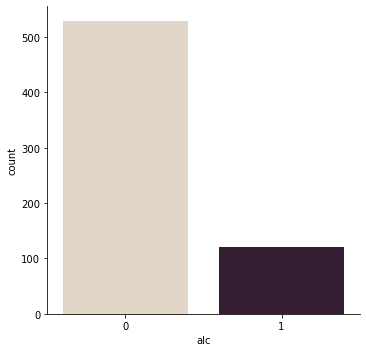

In [8]:
df['alc'] = [0 if x <= 5 else 1 for x in df['week_alc']]
        
print(df['alc'].value_counts())
print(df['alc'].value_counts(normalize = True))

sns.catplot(x="alc", kind="count", palette="ch:.25", data=df)

In [9]:
# checking for Nan values
df.isna().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
week_alc      False
alc           False
dtype: bool

In [10]:
df[df['age']== 22]['age']

279    22
Name: age, dtype: int64

In [11]:
df.drop(labels = 279, inplace=True) #dropping age outlier
df[df['age']== 22]['age']# checking to see if the drop was successful

Series([], Name: age, dtype: int64)

In [12]:
X_df = df.drop(columns = ['Dalc', 'Walc', 'week_alc', 'alc'], axis = 1) # grabs everything else but 'default column'
y = df['alc']
orig_feats = list(X_df.columns)
len(orig_feats)

31

## Exploratory Data Analysis === Check here for EDA

# Feature Engineering

Feature quantifying family stability 

Define this variable ----

In [13]:
df['stability'] = df['famrel'] * df['famsize']

Descriptive Statistics : 
 count    648.000000
mean       2.762346
std        1.960743
min        0.000000
25%        0.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: stability, dtype: float64
Correlation with target var 'alc consumption' : 
 -0.07673173130578956
percentage of data distrib : 
 4    0.342593
0    0.296296
5    0.191358
3    0.118827
2    0.027778
1    0.023148
Name: stability, dtype: float64


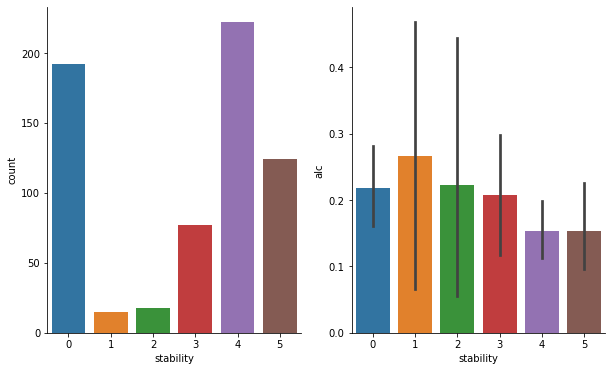

In [14]:
print("Descriptive Statistics :", '\n', df['stability'].describe())
print("Correlation with target var 'alc consumption' :", '\n', df['stability'].corr(df['alc']))
print("percentage of data distrib :", '\n', df.stability.value_counts(normalize=True))

fig, ax = plt.subplots(1, 2, figsize= (10,6))
sns.despine(right=True)
sns.countplot(x="stability", data=df,  ax = ax[0])
sns.barplot(x="stability", y = 'alc', data=df,  ax = ax[1])

feature quantifying academic support network

In [15]:
df['academic_support'] = df.famsup + df.schoolsup  + df.higher 

Descriptive Statistics : 
 count    648.000000
mean       1.614198
std        0.698363
min        0.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        3.000000
Name: academic_support, dtype: float64
Correlation with target var 'alc consumption' : 
 -0.12045336285372545
percentage of data distrib : 
 2    0.521605
1    0.353395
3    0.072531
0    0.052469
Name: academic_support, dtype: float64


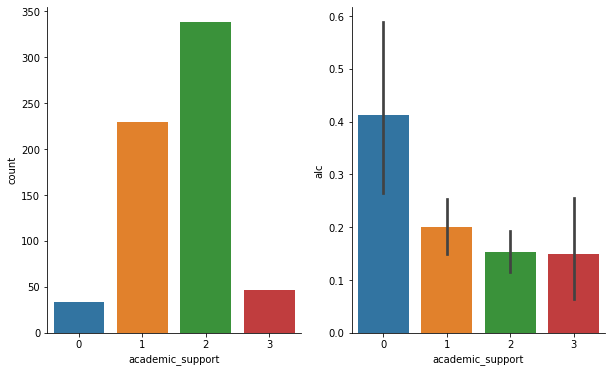

In [16]:
print("Descriptive Statistics :", '\n', df['academic_support'].describe())
print("Correlation with target var 'alc consumption' :", '\n', df['academic_support'].corr(df['alc']))
print("percentage of data distrib :", '\n', df.academic_support.value_counts(normalize=True))

fig, ax = plt.subplots(1, 2, figsize= (10,6))
sns.despine(right=True)
sns.countplot(x="academic_support", data=df,  ax = ax[0])
sns.barplot(x="academic_support",  y ='alc', data=df,  ax = ax[1])

In [17]:
df['idle'] = df.goout*df.freetime

Descriptive Statistics : 
 count    648.000000
mean      10.541667
std        6.031201
min        1.000000
25%        6.000000
50%        9.000000
75%       15.000000
max       25.000000
Name: idle, dtype: float64
Correlation with target variable 'alc consumption' : 
 0.2549773238901153
percentage of data distrib : 
 9     0.158951
12    0.149691
6     0.140432
16    0.097222
20    0.074074
4     0.069444
8     0.057099
25    0.054012
2     0.050926
15    0.047840
3     0.047840
10    0.032407
5     0.010802
1     0.009259
Name: idle, dtype: float64


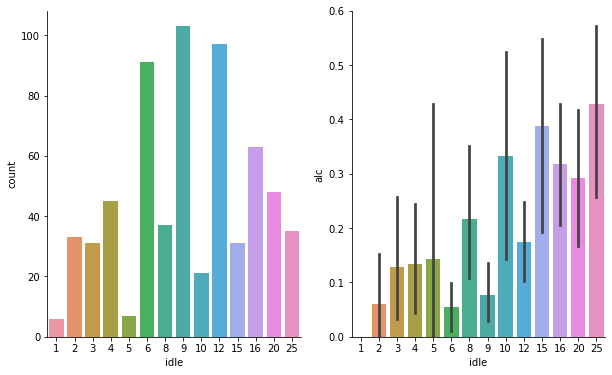

In [18]:
print("Descriptive Statistics :", '\n', df['idle'].describe())
print("Correlation with target variable 'alc consumption' :", '\n', df['idle'].corr(df['alc']))
print("percentage of data distrib :", '\n', df.idle.value_counts(normalize=True))

fig, ax = plt.subplots(1, 2, figsize= (10,6))
sns.despine(right=True)
sns.countplot(x="idle", data=df,  ax = ax[0])
sns.barplot(x="idle", y = 'alc', data=df,  ax = ax[1])

Average Grade

In [19]:
df['grade_avg'] = round((df.G1 + df.G2 + df.G3)/3, 2)

Descriptive Statistics : 
 count    648.000000
mean      11.632762
std        2.828787
min        1.330000
25%       10.000000
50%       11.670000
75%       13.330000
max       18.670000
Name: grade_avg, dtype: float64
Correlation with target alc consumption : 
 -0.20625996193267518


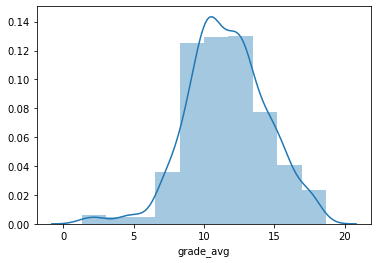

In [20]:
print("Descriptive Statistics :", '\n', df['grade_avg'].describe())
print("Correlation with target alc consumption :", '\n', df['grade_avg'].corr(df['alc']))

sns.despine(right=True)
sns.distplot(a=df["grade_avg"],bins=10, kde=True, hist=True)

# plt.figure(figsize=(5,8))
# df.boxplot(column='grade_avg', by = 'alc')

In [21]:
df['delinquency'] = (df['failures']) * df['absences']

Descriptive Statistics : 
 count    648.000000
mean       1.095679
std        4.306292
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       42.000000
Name: delinquency, dtype: float64
Correlation with target variable 'alc consumption' : 
 0.11079323913434849
percentage of data distrib : 
 0     0.891975
4     0.020062
2     0.012346
12    0.012346
8     0.012346
6     0.012346
14    0.007716
18    0.004630
16    0.004630
30    0.004630
3     0.003086
42    0.003086
5     0.003086
9     0.003086
26    0.001543
27    0.001543
1     0.001543
Name: delinquency, dtype: float64


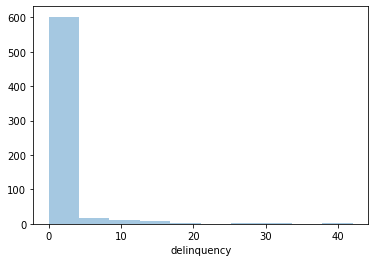

In [22]:
print("Descriptive Statistics :", '\n', df['delinquency'].describe())
print("Correlation with target variable 'alc consumption' :", '\n', df['delinquency'].corr(df['alc']))
print("percentage of data distrib :", '\n', df.delinquency.value_counts(normalize=True))

sns.despine(right=True)
sns.distplot(a=df["delinquency"],bins=10, kde = False ,hist=True)

In [23]:
print(df.shape)

print(df.columns)

(648, 40)
Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'week_alc', 'alc',
       'stability', 'academic_support', 'idle', 'grade_avg', 'delinquency'],
      dtype='object')


In [24]:
dummy1 = pd.get_dummies(df['Medu'],drop_first= True, prefix='Medu')
dummy2 = pd.get_dummies(df['Fedu'],drop_first= True, prefix='Fedu')
dummy3 = pd.get_dummies(df['Mjob'],drop_first= True, prefix='Mjob')
dummy4 = pd.get_dummies(df['Fjob'],drop_first= True, prefix='Fjob')
dummy5 = pd.get_dummies(df['reason'],drop_first= True, prefix='reason')
dummy6 = pd.get_dummies(df['guardian'],drop_first= True, prefix='guardian')
dummy7 = pd.get_dummies(df['traveltime'],drop_first= True, prefix='traveltime')
dummy8 = pd.get_dummies(df['studytime'],drop_first= True, prefix='studytime')
dummy9 = pd.get_dummies(df['failures'],drop_first= True, prefix = 'failures')
dummy10 = pd.get_dummies(df['famrel'],drop_first= True, prefix='famrel')
dummy11 = pd.get_dummies(df['freetime'],drop_first= True, prefix='freetime')
dummy12 = pd.get_dummies(df['goout'],drop_first= True, prefix="goout")
dummy13 = pd.get_dummies(df['health'],drop_first= True, prefix='health')

In [25]:
new_feats = ['grade_avg', 'academic_support', 'stability', 'idle', 'delinquency']
dummy_feats = ['Medu', 'Fedu','Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures','famrel', 'freetime', 'goout','health']

df.drop(columns = ['week_alc', 'Dalc', 'Walc', 'alc'], axis = 1, inplace = True)

In [26]:
df_list = [df, dummy1, dummy2, dummy3, dummy4, dummy5, dummy6, dummy7, 
           dummy8, dummy9, dummy10, dummy11, dummy12, dummy13]


In [27]:
for df in df_list:
    print(df.shape)

(648, 36)
(648, 4)
(648, 4)
(648, 4)
(648, 4)
(648, 3)
(648, 2)
(648, 3)
(648, 3)
(648, 3)
(648, 4)
(648, 4)
(648, 4)
(648, 4)


In [28]:
X = pd.concat(df_list, axis = 1)

In [29]:
print(X.shape)
print(y.shape)

(648, 82)
(648,)


### Train Test Split

In [30]:
#performing train-test split on main dataframe
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=150, test_size=0.2)

#checking the shape of the training set and test set
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape,)
print("Test set - Features: ", X_test.shape, "Target: ",y_test.shape,)
print(y_train.value_counts(normalize = True))
print(y_test.value_counts(normalize = True))

Training set - Features:  (518, 82) Target:  (518,)
Test set - Features:  (130, 82) Target:  (130,)
0    0.820463
1    0.179537
Name: alc, dtype: float64
0    0.8
1    0.2
Name: alc, dtype: float64


### Handling Class Imbalance - with Oversampling minority class

### Upsampling Minority

In [31]:
# concatenate our training data back together
training  = pd.concat([X_train, y_train], axis=1)

In [32]:
# separate minority and majority classes
light_drinker = training[training.alc==0]
heavy_drinker = training[training.alc==1]

# Get a class count to understand the class imbalance.
print('light drinker count: '+ str(len(light_drinker)))
print('heavy drinker count: '+ str(len(heavy_drinker)))

light drinker count: 425
heavy drinker count: 93


In [33]:
from sklearn.utils import resample

In [34]:
# upsample minority
heavy_drinker_upsampled = resample(heavy_drinker,
                          replace=True, # sample with replacement
                          n_samples=len(light_drinker), # match number in majority class
                          random_state=23) # reproducible results
heavy_drinker_upsampled.shape

(425, 83)

In [35]:
# combine majority and upsampled minority
upsampled = pd.concat([light_drinker, heavy_drinker_upsampled])

# check new class counts
upsampled.alc.value_counts()

1    425
0    425
Name: alc, dtype: int64

In [36]:
# trying logistic regression again with the balanced dataset
y_train_up = upsampled.alc
X_train_up = upsampled.drop(columns = 'alc', axis=1)
X_train_up.drop(columns = dummy_feats, axis=1, inplace=True)
X_train_up.shape

# print(y_train_u.value_counts(normalize = True))
# print(X_train_u.value_counts(normalize = True))

(850, 69)

# Feature Selection

In [37]:
print(len(orig_feats))
print(len(new_feats))
print(len(dummy_feats))
print(X_train_up.shape)
print(y_train_up.shape)

31
5
13
(850, 69)
(850,)


### Select Kbest 10

In [38]:
#setting parameters to choose the best 10 variables based on the significance of the variable F stat
selector = SelectKBest(f_classif, k=10) #setting parameters to choose the best 10 variables based on the significance of the variable F stat

#Fitting selector object to training set
selector.fit(X_train_up, y_train_up)

selected_columns = X_train_up.columns[selector.get_support()]
removed_columns = X_train_up.columns[~selector.get_support()]

X_train_kb10 = X_train_up[selected_columns]
X_test_kb10 = X_test[selected_columns]
print(X_train_kb10.shape, X_test_kb10.shape)

(850, 10) (130, 10)


### Select Kbest 15

In [39]:
#setting parameters to choose the best 50 variables based on the significance of the variable F stat
selector = SelectKBest(f_classif, k=15) #setting parameters to choose the best 50 variables based on the significance of the variable F stat

#Fitting selector object to training set
selector.fit(X_train_up, y_train_up)

selected_columns = X_train_up.columns[selector.get_support()]
removed_columns = X_train_up.columns[~selector.get_support()]

X_train_kb15 = X_train_up[selected_columns]
X_test_kb15 = X_test[selected_columns]

### Select Kbest 20

In [40]:
#setting parameters to choose the best 50 variables based on the significance of the variable F stat
selector = SelectKBest(f_classif, k=20) #setting parameters to choose the best 50 variables based on the significance of the variable F stat

#Fitting selector object to training set
selector.fit(X_train_up, y_train_up)

selected_columns = X_train_up.columns[selector.get_support()]
removed_columns = X_train_up.columns[~selector.get_support()]

X_train_kb20 = X_train_up[selected_columns]
X_test_kb20 = X_test[selected_columns]

### Select Kbest 25

In [41]:
#setting parameters to choose the best 50 variables based on the significance of the variable F stat
selector = SelectKBest(f_classif, k=25) #setting parameters to choose the best 50 variables based on the significance of the variable F stat

#Fitting selector object to training set
selector.fit(X_train_up, y_train_up)

selected_columns = X_train_up.columns[selector.get_support()]
removed_columns = X_train_up.columns[~selector.get_support()]

X_train_kb25 = X_train_up[selected_columns]
X_test_kb25 = X_test[selected_columns]

### Select Kbest 30

In [42]:
#setting parameters to choose the best 50 variables based on the significance of the variable F stat
selector = SelectKBest(f_classif, k=30) #setting parameters to choose the best 50 variables based on the significance of the variable F stat

#Fitting selector object to training set
selector.fit(X_train_up, y_train_up)

selected_columns = X_train_up.columns[selector.get_support()]
removed_columns = X_train_up.columns[~selector.get_support()]

X_train_kb30 = X_train_up[selected_columns]
X_test_kb30 = X_test[selected_columns]

### Select Kbest 35

In [43]:
#setting parameters to choose the best 50 variables based on the significance of the variable F stat
selector = SelectKBest(f_classif, k=35) #setting parameters to choose the best 50 variables based on the significance of the variable F stat

#Fitting selector object to training set
selector.fit(X_train_up, y_train_up)

selected_columns = X_train_up.columns[selector.get_support()]
removed_columns = X_train_up.columns[~selector.get_support()]

X_train_kb35 = X_train_up[selected_columns]
X_test_kb35 = X_test[selected_columns]

# Models

Our target variable in this project, tells whether a student is a heavy alcohol drinker or not. Our main concern here becomes that we do not want to predict that a student is not a heavy drinker when they actually are. Thus, we are interested in minimizing chances of any False Negatives. Correctly, identifying student has a problem allows us to appropriately allocate help or resources to ameliorate conditions for that student/s to minimize any drinking problem. 

Thus, our focus will be on the recall score or sensitivity score that tells us the proportion of actual positives identified correctly, given by (TP/(TP+FN). The higher this score, the better. 

We also looked at the Accuracy score and the F1 scores as extra metrics to compare model performance on.

### 1. BASELINE Model
**Running a model without any class imbalance resolution on the original features with no transformations or scaling**

In [44]:
lr1 = LogisticRegression(solver='liblinear', random_state=150)

lr1.fit(X_train[orig_feats], y_train)

y_pred_test = lr1.predict(X_test[orig_feats])
y_pred_train = lr1.predict(X_train[orig_feats])

# checking accuracy
print('Test Accuracy score: ', metrics.accuracy_score(y_test, y_pred_test))
print('Train Accuracy score: ', metrics.accuracy_score(y_train, y_pred_train))

# checking accuracy
print('Test F1 score: ', metrics.f1_score(y_test, y_pred_test))
print('Train F1 score: ', metrics.f1_score(y_train, y_pred_train))

# checking accuracy
print('Test Recall score: ', metrics.recall_score(y_test, y_pred_test))
print('Train Recall score: ', metrics.recall_score(y_train, y_pred_train))

Test Accuracy score:  0.8384615384615385
Train Accuracy score:  0.8706563706563707
Test F1 score:  0.43243243243243246
Train F1 score:  0.5562913907284769
Test Recall score:  0.3076923076923077
Train Recall score:  0.45161290322580644


In [45]:
results = {}

results['1.lr_baseline'] = (round(metrics.accuracy_score(y_test, y_pred_test),4), 
                            round(metrics.f1_score(y_test, y_pred_test),4), 
                          round(metrics.recall_score(y_test, y_pred_test),4))
results

{'1.lr_baseline': (0.8385, 0.4324, 0.3077)}

#### Removing the dummied features from the train and test sets

In [46]:
X_train1 = X_train.drop(columns = dummy_feats, axis = 1)
X_test1 = X_test.drop(columns = dummy_feats, axis = 1)

### Scaling train and test sets

In [47]:
scaler1 = MinMaxScaler()  
scaler1.fit(X_train1)
# Scaling Imbalanced data
X_train_scaleI = scaler1.transform(X_train1)  
X_test_scale = scaler1.transform(X_test1)

#Scaling upsampled data
scaler2 = MinMaxScaler()  
scaler2.fit(X_train_up)

X_train_scaleu = scaler2.transform(X_train_up)  


In [48]:
print(X_train.shape) # All features train set
print(X_test.shape) # All features test set

print(X_train1.shape) #Removed dummied features
print(X_test1.shape) # Removed dummied features

print(X_train_up.shape) #Upsampled train set and no dummied vars
print(y_train_up.shape)

print(X_train_scaleI.shape) # Scaled Imbalanced X_train1 set

print(X_train_scaleu.shape) # Scaled upsampled X_train_up set
print(X_test_scale.shape) # Scaled X_test1 set

print(y_test.shape)

(518, 82)
(130, 82)
(518, 69)
(130, 69)
(850, 69)
(850,)
(518, 69)
(850, 69)
(130, 69)
(130,)


### 2. Logistic Regression with X_train_up (Upsampled Unscaled Train set)

In [49]:
upsampled_lr = LogisticRegression(solver='liblinear')


upsampled_lr.fit(X_train_up, y_train_up)


upsampled_pred_test = upsampled_lr.predict(X_test1)
upsampled_pred_train = upsampled_lr.predict(X_train_up)


# checking accuracy
print('Test Accuracy score: ', metrics.accuracy_score(y_test, upsampled_pred_test))
print('Train Accuracy score: ', metrics.accuracy_score(y_train_up, upsampled_pred_train))

# checking accuracy
print('Test F1 score: ', metrics.f1_score(y_test, upsampled_pred_test))
print('Train F1 score: ', metrics.f1_score(y_train_up, upsampled_pred_train))

# checking accuracy
print('Test Recall score: ', metrics.recall_score(y_test, upsampled_pred_test))
print('Train Recall score: ', metrics.recall_score(y_train_up, upsampled_pred_train))

Test Accuracy score:  0.8307692307692308
Train Accuracy score:  0.8564705882352941
Test F1 score:  0.5769230769230769
Train F1 score:  0.858139534883721
Test Recall score:  0.5769230769230769
Train Recall score:  0.8682352941176471


In [50]:
results['2. lr_upsampled'] = (round(metrics.accuracy_score(y_test, upsampled_pred_test),4), 
                           round(metrics.f1_score(y_test, upsampled_pred_test),4),
                          round(metrics.recall_score(y_test, upsampled_pred_test)))
results

{'1.lr_baseline': (0.8385, 0.4324, 0.3077),
 '2. lr_upsampled': (0.8308, 0.5769, 1)}

### 3. Logistic Regression with X_train_up (Upsampled and Scaled Train set)

In [51]:
upscaled_lr = LogisticRegression(solver='liblinear')


upscaled_lr.fit(X_train_scaleu, y_train_up)


upscaled_pred_test = upsampled_lr.predict(X_test_scale)
upscaled_pred_train = upsampled_lr.predict(X_train_scaleu)


# checking accuracy
print('Test Accuracy score: ', metrics.accuracy_score(y_test, upscaled_pred_test))
print('Train Accuracy score: ', metrics.accuracy_score(y_train_up, upscaled_pred_train))

# checking accuracy
print('Test F1 score: ', metrics.f1_score(y_test, upscaled_pred_test))
print('Train F1 score: ', metrics.f1_score(y_train_up, upscaled_pred_train))

# checking accuracy
print('Test Recall score: ', metrics.recall_score(y_test, upscaled_pred_test))
print('Train Recall score: ', metrics.recall_score(y_train_up, upscaled_pred_train))

Test Accuracy score:  0.7846153846153846
Train Accuracy score:  0.6976470588235294
Test F1 score:  0.2631578947368421
Train F1 score:  0.5874799357945425
Test Recall score:  0.19230769230769232
Train Recall score:  0.43058823529411766


In [52]:
results['3.  lr_upscaled'] = (round(metrics.accuracy_score(y_test, upscaled_pred_test),4), 
                           round(metrics.f1_score(y_test, upscaled_pred_test),4),
                          round(metrics.recall_score(y_train_up, upscaled_pred_train),4))
results


{'1.lr_baseline': (0.8385, 0.4324, 0.3077),
 '2. lr_upsampled': (0.8308, 0.5769, 1),
 '3.  lr_upscaled': (0.7846, 0.2632, 0.4306)}

### 4. Logistic Regression with K best 10

In [53]:
kb10_lr = LogisticRegression(solver='liblinear')


kb10_lr.fit(X_train_kb10, y_train_up)


kb10_pred_test = kb10_lr.predict(X_test_kb10)
kb10_pred_train = kb10_lr.predict(X_train_kb10)


# checking accuracy
print('Test Accuracy score: ', metrics.accuracy_score(y_test, kb10_pred_test))
print('Train Accuracy score: ', metrics.accuracy_score(y_train_up, kb10_pred_train))

# checking accuracy
print('Test F1 score: ', metrics.f1_score(y_test, kb10_pred_test))
print('Train F1 score: ', metrics.f1_score(y_train_up, kb10_pred_train))

# checking accuracy
print('Test Recall score: ', metrics.recall_score(y_test, kb10_pred_test))
print('Train Recall score: ', metrics.recall_score(y_train_up, kb10_pred_train))

Test Accuracy score:  0.823076923076923
Train Accuracy score:  0.7670588235294118
Test F1 score:  0.5964912280701755
Train F1 score:  0.7620192307692307
Test Recall score:  0.6538461538461539
Train Recall score:  0.7458823529411764


In [54]:
results['4. lr_kb10'] = (round(metrics.accuracy_score(y_test, kb10_pred_test),4), 
                           round(metrics.f1_score(y_test, kb10_pred_test),4),
                     round(metrics.recall_score(y_test, kb10_pred_test),4))
results

{'1.lr_baseline': (0.8385, 0.4324, 0.3077),
 '2. lr_upsampled': (0.8308, 0.5769, 1),
 '3.  lr_upscaled': (0.7846, 0.2632, 0.4306),
 '4. lr_kb10': (0.8231, 0.5965, 0.6538)}

### 5. Logistic Regression with K best 15

In [55]:
kb15_lr = LogisticRegression(solver='liblinear')

kb15_lr.fit(X_train_kb15, y_train_up)


kb15_pred_test = kb15_lr.predict(X_test_kb15)
kb15_pred_train = kb15_lr.predict(X_train_kb15)


# checking accuracy
print('Test Accuracy score: ', metrics.accuracy_score(y_test, kb15_pred_test))
print('Train Accuracy score: ', metrics.accuracy_score(y_train_up, kb15_pred_train))

# checking accuracy
print('Test F1 score: ', metrics.f1_score(y_test, kb15_pred_test))
print('Train F1 score: ', metrics.f1_score(y_train_up, kb15_pred_train))

# checking accuracy
print('Test Recall score: ', metrics.recall_score(y_test, kb15_pred_test))
print('Train Recall score: ', metrics.recall_score(y_train_up, kb15_pred_train))

Test Accuracy score:  0.7692307692307693
Train Accuracy score:  0.8
Test F1 score:  0.4642857142857143
Train F1 score:  0.8000000000000002
Test Recall score:  0.5
Train Recall score:  0.8


In [56]:
results['5. lr_kb15'] = (round(metrics.accuracy_score(y_test, kb15_pred_test),4), 
                           round(metrics.f1_score(y_test, kb15_pred_test),4),
                     round(metrics.recall_score(y_test, kb15_pred_test),4))
results

{'1.lr_baseline': (0.8385, 0.4324, 0.3077),
 '2. lr_upsampled': (0.8308, 0.5769, 1),
 '3.  lr_upscaled': (0.7846, 0.2632, 0.4306),
 '4. lr_kb10': (0.8231, 0.5965, 0.6538),
 '5. lr_kb15': (0.7692, 0.4643, 0.5)}

### 6. Logistic Regression with K best 20

In [57]:
kb20_lr = LogisticRegression(solver='liblinear')

kb20_lr.fit(X_train_kb20, y_train_up)


kb20_pred_test = kb20_lr.predict(X_test_kb20)
kb20_pred_train = kb20_lr.predict(X_train_kb20)


# checking accuracy
print('Test Accuracy score: ', metrics.accuracy_score(y_test, kb20_pred_test))
print('Train Accuracy score: ', metrics.accuracy_score(y_train_up, kb20_pred_train))

# checking accuracy
print('Test F1 score: ', metrics.f1_score(y_test, kb20_pred_test))
print('Train F1 score: ', metrics.f1_score(y_train_up, kb20_pred_train))

# checking accuracy
print('Test Recall score: ', metrics.recall_score(y_test, kb20_pred_test))
print('Train Recall score: ', metrics.recall_score(y_train_up, kb20_pred_train))

Test Accuracy score:  0.7769230769230769
Train Accuracy score:  0.7694117647058824
Test F1 score:  0.4528301886792453
Train F1 score:  0.7672209026128267
Test Recall score:  0.46153846153846156
Train Recall score:  0.76


In [58]:
results['6.lr_kb20'] = (round(metrics.accuracy_score(y_test, kb20_pred_test),4), 
                           round(metrics.f1_score(y_test, kb20_pred_test),4),
                     round(metrics.recall_score(y_test, kb20_pred_test),4))
results

{'1.lr_baseline': (0.8385, 0.4324, 0.3077),
 '2. lr_upsampled': (0.8308, 0.5769, 1),
 '3.  lr_upscaled': (0.7846, 0.2632, 0.4306),
 '4. lr_kb10': (0.8231, 0.5965, 0.6538),
 '5. lr_kb15': (0.7692, 0.4643, 0.5),
 '6.lr_kb20': (0.7769, 0.4528, 0.4615)}

### 7. Logistic Regression with K best 25

In [59]:
kb25_lr = LogisticRegression(solver='liblinear')

kb25_lr.fit(X_train_kb25, y_train_up)


kb25_pred_test = kb25_lr.predict(X_test_kb25)
kb25_pred_train = kb25_lr.predict(X_train_kb25)


# checking accuracy
print('Test Accuracy score: ', metrics.accuracy_score(y_test, kb25_pred_test))
print('Train Accuracy score: ', metrics.accuracy_score(y_train_up, kb25_pred_train))

# checking accuracy
print('Test F1 score: ', metrics.f1_score(y_test, kb25_pred_test))
print('Train F1 score: ', metrics.f1_score(y_train_up, kb25_pred_train))

# checking accuracy
print('Test Recall score: ', metrics.recall_score(y_test, kb25_pred_test))
print('Train Recall score: ', metrics.recall_score(y_train_up, kb25_pred_train))

Test Accuracy score:  0.7769230769230769
Train Accuracy score:  0.7623529411764706
Test F1 score:  0.4727272727272727
Train F1 score:  0.7583732057416267
Test Recall score:  0.5
Train Recall score:  0.7458823529411764


In [60]:
results['7. lr_kb25'] = (round(metrics.accuracy_score(y_test, kb25_pred_test),4), 
                           round(metrics.f1_score(y_test, kb25_pred_test),4),
                     round(metrics.recall_score(y_test, kb25_pred_test),4))
results

{'1.lr_baseline': (0.8385, 0.4324, 0.3077),
 '2. lr_upsampled': (0.8308, 0.5769, 1),
 '3.  lr_upscaled': (0.7846, 0.2632, 0.4306),
 '4. lr_kb10': (0.8231, 0.5965, 0.6538),
 '5. lr_kb15': (0.7692, 0.4643, 0.5),
 '6.lr_kb20': (0.7769, 0.4528, 0.4615),
 '7. lr_kb25': (0.7769, 0.4727, 0.5)}

### 8. Logistic Regression with K best 30

In [61]:
kb30_lr = LogisticRegression(solver='liblinear')

kb30_lr.fit(X_train_kb30, y_train_up)


kb30_pred_test = kb30_lr.predict(X_test_kb30)
kb30_pred_train = kb30_lr.predict(X_train_kb30)


# checking accuracy
print('Test Accuracy score: ', metrics.accuracy_score(y_test, kb30_pred_test))
print('Train Accuracy score: ', metrics.accuracy_score(y_train_up, kb30_pred_train))

# checking accuracy
print('Test F1 score: ', metrics.f1_score(y_test, kb30_pred_test))
print('Train F1 score: ', metrics.f1_score(y_train_up, kb30_pred_train))

# checking accuracy
print('Test Recall score: ', metrics.recall_score(y_test, kb30_pred_test))
print('Train Recal score: ', metrics.recall_score(y_train_up, kb30_pred_train))

Test Accuracy score:  0.7769230769230769
Train Accuracy score:  0.8235294117647058
Test F1 score:  0.40816326530612246
Train F1 score:  0.8247663551401869
Test Recall score:  0.38461538461538464
Train Recal score:  0.8305882352941176


In [62]:
results['8. lr_kb30'] = (round(metrics.accuracy_score(y_test, kb30_pred_test),4), 
                           round(metrics.f1_score(y_test, kb30_pred_test),4),
                     round(metrics.recall_score(y_test, kb30_pred_test),4))
results

{'1.lr_baseline': (0.8385, 0.4324, 0.3077),
 '2. lr_upsampled': (0.8308, 0.5769, 1),
 '3.  lr_upscaled': (0.7846, 0.2632, 0.4306),
 '4. lr_kb10': (0.8231, 0.5965, 0.6538),
 '5. lr_kb15': (0.7692, 0.4643, 0.5),
 '6.lr_kb20': (0.7769, 0.4528, 0.4615),
 '7. lr_kb25': (0.7769, 0.4727, 0.5),
 '8. lr_kb30': (0.7769, 0.4082, 0.3846)}

### 9. Logistic Regression with K best 35

In [63]:
kb35_lr = LogisticRegression(solver='liblinear')

kb35_lr.fit(X_train_kb35, y_train_up)


kb35_pred_test = kb35_lr.predict(X_test_kb35)
kb35_pred_train = kb35_lr.predict(X_train_kb35)


# checking accuracy
print('Test Accuracy score: ', metrics.accuracy_score(y_test, kb35_pred_test))
print('Train Accuracy score: ', metrics.accuracy_score(y_train_up, kb35_pred_train))

# checking accuracy
print('Test F1 score: ', metrics.f1_score(y_test, kb35_pred_test))
print('Train F1 score: ', metrics.f1_score(y_train_up, kb35_pred_train))

# checking accuracy
print('Test Recall score: ', metrics.recall_score(y_test, kb35_pred_test))
print('Train Recall score: ', metrics.recall_score(y_train_up, kb35_pred_train))

Test Accuracy score:  0.8076923076923077
Train Accuracy score:  0.8152941176470588
Test F1 score:  0.5098039215686274
Train F1 score:  0.8159437280187573
Test Recall score:  0.5
Train Recall score:  0.8188235294117647


In [64]:
results['9. lr_kb35'] = (round(metrics.accuracy_score(y_test, kb35_pred_test),4), 
                           round(metrics.f1_score(y_test, kb35_pred_test),4),
                     round(metrics.recall_score(y_test, kb35_pred_test),4))
results

{'1.lr_baseline': (0.8385, 0.4324, 0.3077),
 '2. lr_upsampled': (0.8308, 0.5769, 1),
 '3.  lr_upscaled': (0.7846, 0.2632, 0.4306),
 '4. lr_kb10': (0.8231, 0.5965, 0.6538),
 '5. lr_kb15': (0.7692, 0.4643, 0.5),
 '6.lr_kb20': (0.7769, 0.4528, 0.4615),
 '7. lr_kb25': (0.7769, 0.4727, 0.5),
 '8. lr_kb30': (0.7769, 0.4082, 0.3846),
 '9. lr_kb35': (0.8077, 0.5098, 0.5)}

### 10.  K best for the Upsampled and  Scaled Train Set -KNN1

#### Optimal K for KNN

In [65]:
#fumction to find the position of the maximum value in a list
def max_value(l):
    max_val = max(l)
    max_idx = l.index(max_val)
    return max_idx, max_val

In [66]:
#create a container to track the scores
k_scores1=[]

#set up a loop to fit the model using a different values of K

k_range = list(range(10, 35))
for k in k_range:
    knn1 = KNeighborsClassifier(n_neighbors=k)
    #fit the model and get the score on a evaluation metric
    knn1.fit(X_train_scaleu, y_train_up)
    y_pred = knn1.predict(X_test_scale)
    
    acc2 = metrics.accuracy_score(y_test, y_pred)
    
    k_scores1.append(acc2)

#use the max_value function to find the K value that gives you the best accuracy pred 
idx, val = max_value(k_scores1)
    
print(idx+1, val)

11 0.7538461538461538


In [67]:
knn = KNeighborsClassifier(n_neighbors=11)

knn.fit(X_train_scaleu, y_train_up)

y_pred_test =knn.predict(X_test_scale)
y_pred_train = knn.predict(X_train_scaleu)

# checking accuracy
print('Test Accuracy score: ', metrics.accuracy_score(y_test, y_pred_test))
print('Train Accuracy score: ', metrics.accuracy_score(y_train_up, y_pred_train))

# checking accuracy
print('Test F1 score: ', metrics.f1_score(y_test, y_pred_test))
print('Train F1 score: ', metrics.f1_score(y_train_up, y_pred_train))

# checking accuracy
print('Test Recall score: ', metrics.recall_score(y_test, y_pred_test))
print('Train Recall score: ', metrics.recall_score(y_train_up, y_pred_train))

Test Accuracy score:  0.7
Train Accuracy score:  0.7988235294117647
Test F1 score:  0.4657534246575342
Train F1 score:  0.8089385474860334
Test Recall score:  0.6538461538461539
Train Recall score:  0.851764705882353


In [68]:
results['10. knn_upscaled'] = (round(metrics.accuracy_score(y_test, y_pred_test),4), 
                              round(metrics.f1_score(y_test, y_pred_test),4),
                          round(metrics.recall_score(y_test, y_pred_test),4))
results

{'1.lr_baseline': (0.8385, 0.4324, 0.3077),
 '2. lr_upsampled': (0.8308, 0.5769, 1),
 '3.  lr_upscaled': (0.7846, 0.2632, 0.4306),
 '4. lr_kb10': (0.8231, 0.5965, 0.6538),
 '5. lr_kb15': (0.7692, 0.4643, 0.5),
 '6.lr_kb20': (0.7769, 0.4528, 0.4615),
 '7. lr_kb25': (0.7769, 0.4727, 0.5),
 '8. lr_kb30': (0.7769, 0.4082, 0.3846),
 '9. lr_kb35': (0.8077, 0.5098, 0.5),
 '10. knn_upscaled': (0.7, 0.4658, 0.6538)}

### 11. K best for the Imbalanced and  Scaled Train Set - KNN2

In [69]:
#create a container to track the scores
k_scores2=[]

#set up a loop to fit the model using a different values of K

k_range = list(range(10, 35))
for k in k_range:
    knn2 = KNeighborsClassifier(n_neighbors=k)
    #fit the model and get the score on a evaluation metric
    knn2.fit(X_train_scaleI, y_train)
    y_pred= knn2.predict(X_test_scale)
    
    acc2 = metrics.accuracy_score(y_test, y_pred)
    
    k_scores2.append(acc2)

#use the max_value function to find the K value that gives you the best accuracy pred 
idx, val = max_value(k_scores2)
    
print(idx+1, val)

1 0.8153846153846154


In [70]:
knn2 = KNeighborsClassifier(n_neighbors=1)

knn2.fit(X_train_scaleI, y_train)

y_pred_test =knn2.predict(X_test_scale)
y_pred_train = knn2.predict(X_train_scaleI)

# checking accuracy
print('Test Accuracy score: ', metrics.accuracy_score(y_test, y_pred_test))
print('Train Accuracy score: ', metrics.accuracy_score(y_train, y_pred_train))

# checking accuracy
print('Test F1 score: ', metrics.f1_score(y_test, y_pred_test))
print('Train F1 score: ', metrics.f1_score(y_train, y_pred_train))

# checking accuracy
print('Test Recall score: ', metrics.recall_score(y_test, y_pred_test))
print('Train Recall; score: ', metrics.recall_score(y_train, y_pred_train))

Test Accuracy score:  0.7846153846153846
Train Accuracy score:  1.0
Test F1 score:  0.41666666666666663
Train F1 score:  1.0
Test Recall score:  0.38461538461538464
Train Recall; score:  1.0


In [71]:
results['11. knn2_imbscaled'] = (round(metrics.accuracy_score(y_test, y_pred_test),4), 
                             round(metrics.recall_score(y_test, y_pred_test),4),
                            round(metrics.recall_score(y_test, y_pred_test),4))
results

{'1.lr_baseline': (0.8385, 0.4324, 0.3077),
 '2. lr_upsampled': (0.8308, 0.5769, 1),
 '3.  lr_upscaled': (0.7846, 0.2632, 0.4306),
 '4. lr_kb10': (0.8231, 0.5965, 0.6538),
 '5. lr_kb15': (0.7692, 0.4643, 0.5),
 '6.lr_kb20': (0.7769, 0.4528, 0.4615),
 '7. lr_kb25': (0.7769, 0.4727, 0.5),
 '8. lr_kb30': (0.7769, 0.4082, 0.3846),
 '9. lr_kb35': (0.8077, 0.5098, 0.5),
 '10. knn_upscaled': (0.7, 0.4658, 0.6538),
 '11. knn2_imbscaled': (0.7846, 0.3846, 0.3846)}

### 12. KNN for the Kbest25

In [72]:
#Scaling upsampled data
scaler3 = MinMaxScaler()  
scaler3.fit(X_train_kb25)

X_train_kb25scale = scaler3.transform(X_train_kb25) 

knn3 = KNeighborsClassifier(n_neighbors=11)

knn3.fit(X_train_kb25scale, y_train_up)

y_pred_test =knn3.predict(X_test_kb25)
y_pred_train = knn3.predict(X_train_kb25scale)

# checking accuracy
print('Test Accuracy score: ', metrics.accuracy_score(y_test, y_pred_test))
print('Train Accuracy score: ', metrics.accuracy_score(y_train_up, y_pred_train))

# checking accuracy
print('Test F1 score: ', metrics.f1_score(y_test, y_pred_test))
print('Train F1 score: ', metrics.f1_score(y_train_up, y_pred_train))

# checking accuracy
print('Test Recall score: ', metrics.recall_score(y_test, y_pred_test))
print('Train Recall score: ', metrics.recall_score(y_train_up, y_pred_train))

Test Accuracy score:  0.823076923076923
Train Accuracy score:  0.8164705882352942
Test F1 score:  0.25806451612903225
Train F1 score:  0.8223234624145785
Test Recall score:  0.15384615384615385
Train Recall score:  0.8494117647058823


In [73]:
results['12. knn3_kb25'] = (round(metrics.accuracy_score(y_test, y_pred_test),4), 
                             round(metrics.f1_score(y_test, y_pred_test),4),
                            round(metrics.recall_score(y_test, y_pred_test),4))
results

{'1.lr_baseline': (0.8385, 0.4324, 0.3077),
 '2. lr_upsampled': (0.8308, 0.5769, 1),
 '3.  lr_upscaled': (0.7846, 0.2632, 0.4306),
 '4. lr_kb10': (0.8231, 0.5965, 0.6538),
 '5. lr_kb15': (0.7692, 0.4643, 0.5),
 '6.lr_kb20': (0.7769, 0.4528, 0.4615),
 '7. lr_kb25': (0.7769, 0.4727, 0.5),
 '8. lr_kb30': (0.7769, 0.4082, 0.3846),
 '9. lr_kb35': (0.8077, 0.5098, 0.5),
 '10. knn_upscaled': (0.7, 0.4658, 0.6538),
 '11. knn2_imbscaled': (0.7846, 0.3846, 0.3846),
 '12. knn3_kb25': (0.8231, 0.2581, 0.1538)}

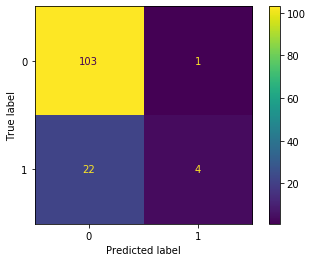

In [74]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_test)

cm_display = ConfusionMatrixDisplay(cm).plot()

### 13. KNN for Kbest 30

In [75]:
#Scaling upsampled data
scaler4 = MinMaxScaler()  
scaler4.fit(X_train_kb30)

X_train_kb30scale = scaler4.transform(X_train_kb30)
                                     
knn4 = KNeighborsClassifier(n_neighbors=11)

knn4.fit(X_train_kb30scale, y_train_up)

y_pred_test =knn4.predict(X_test_kb30)
y_pred_train = knn4.predict(X_train_kb30scale)

# checking accuracy
print('Test Accuracy score: ', metrics.accuracy_score(y_test, y_pred_test))
print('Train Accuracy score: ', metrics.accuracy_score(y_train_up, y_pred_train))

# checking accuracy
print('Test F1 score: ', metrics.f1_score(y_test, y_pred_test))
print('Train F1 score: ', metrics.f1_score(y_train_up, y_pred_train))

# checking accuracy
print('Test Recall score: ', metrics.recall_score(y_test, y_pred_test))
print('Train Recall score: ', metrics.recall_score(y_train_up, y_pred_train))

Test Accuracy score:  0.823076923076923
Train Accuracy score:  0.831764705882353
Test F1 score:  0.25806451612903225
Train F1 score:  0.8387824126268321
Test Recall score:  0.15384615384615385
Train Recall score:  0.8752941176470588


In [76]:
results['13. knn4_kb30'] = (round(metrics.accuracy_score(y_test, y_pred_test),4), 
                             round(metrics.recall_score(y_test, y_pred_test),4),
                            round(metrics.recall_score(y_test, y_pred_test),4))
results

{'1.lr_baseline': (0.8385, 0.4324, 0.3077),
 '2. lr_upsampled': (0.8308, 0.5769, 1),
 '3.  lr_upscaled': (0.7846, 0.2632, 0.4306),
 '4. lr_kb10': (0.8231, 0.5965, 0.6538),
 '5. lr_kb15': (0.7692, 0.4643, 0.5),
 '6.lr_kb20': (0.7769, 0.4528, 0.4615),
 '7. lr_kb25': (0.7769, 0.4727, 0.5),
 '8. lr_kb30': (0.7769, 0.4082, 0.3846),
 '9. lr_kb35': (0.8077, 0.5098, 0.5),
 '10. knn_upscaled': (0.7, 0.4658, 0.6538),
 '11. knn2_imbscaled': (0.7846, 0.3846, 0.3846),
 '12. knn3_kb25': (0.8231, 0.2581, 0.1538),
 '13. knn4_kb30': (0.8231, 0.1538, 0.1538)}

### 14.Decision Tree Classifier

In [77]:
dtc1 = DecisionTreeClassifier(max_depth=10)

#Train Decision Tree Classifier
dtc1.fit(X_train_up,y_train_up)

#predict the training set
y_pred_train = dtc1.predict(X_train_up)

#Predict the response for test dataset
y_pred_test = dtc1.predict(X_test1)

# Model Accuracy, how often is the classifier correct?
# checking accuracy
print('Test Accuracy score: ', metrics.accuracy_score(y_test, y_pred_test))
print('Train Accuracy score: ', metrics.accuracy_score(y_train_up, y_pred_train))

# checking accuracy
print('Test F1 score: ', metrics.f1_score(y_test, y_pred_test))
print('Train F1 score: ', metrics.f1_score(y_train_up, y_pred_train))

# checking accuracy
print('Test Recall score: ', metrics.recall_score(y_test, y_pred_test))
print('Train Recall score: ', metrics.recall_score(y_train_up, y_pred_train))

Test Accuracy score:  0.7538461538461538
Train Accuracy score:  0.9835294117647059
Test F1 score:  0.35999999999999993
Train F1 score:  0.9837962962962963
Test Recall score:  0.34615384615384615
Train Recall score:  1.0


In [78]:
results['14. dtc1_imbalanced'] = (round(metrics.accuracy_score(y_test, y_pred_test),4), 
                             round(metrics.f1_score(y_test, y_pred_test),4), 
                             round(metrics.recall_score(y_test, y_pred_test),4))
results

{'1.lr_baseline': (0.8385, 0.4324, 0.3077),
 '2. lr_upsampled': (0.8308, 0.5769, 1),
 '3.  lr_upscaled': (0.7846, 0.2632, 0.4306),
 '4. lr_kb10': (0.8231, 0.5965, 0.6538),
 '5. lr_kb15': (0.7692, 0.4643, 0.5),
 '6.lr_kb20': (0.7769, 0.4528, 0.4615),
 '7. lr_kb25': (0.7769, 0.4727, 0.5),
 '8. lr_kb30': (0.7769, 0.4082, 0.3846),
 '9. lr_kb35': (0.8077, 0.5098, 0.5),
 '10. knn_upscaled': (0.7, 0.4658, 0.6538),
 '11. knn2_imbscaled': (0.7846, 0.3846, 0.3846),
 '12. knn3_kb25': (0.8231, 0.2581, 0.1538),
 '13. knn4_kb30': (0.8231, 0.1538, 0.1538),
 '14. dtc1_imbalanced': (0.7538, 0.36, 0.3462)}

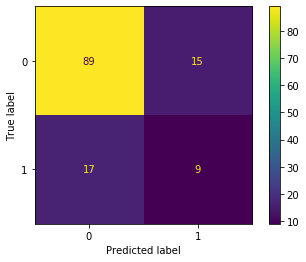

In [79]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_test)

cm_display = ConfusionMatrixDisplay(cm).plot()

# Final Model

In [80]:
kb10_lr = LogisticRegression(solver='liblinear')


kb10_lr.fit(X_train_kb10, y_train_up)


kb10_pred_test = kb10_lr.predict(X_test_kb10)
kb10_pred_train = kb10_lr.predict(X_train_kb10)


# checking accuracy
print('Test Accuracy score: ', metrics.accuracy_score(y_test, kb10_pred_test))
print('Train Accuracy score: ', metrics.accuracy_score(y_train_up, kb10_pred_train))

# checking accuracy
print('Test F1 score: ', metrics.f1_score(y_test, kb10_pred_test))
print('Train F1 score: ', metrics.f1_score(y_train_up, kb10_pred_train))

# checking accuracy
print('Test Recall score: ', metrics.recall_score(y_test, kb10_pred_test))
print('Train Recall score: ', metrics.recall_score(y_train_up, kb10_pred_train))

Test Accuracy score:  0.823076923076923
Train Accuracy score:  0.7670588235294118
Test F1 score:  0.5964912280701755
Train F1 score:  0.7620192307692307
Test Recall score:  0.6538461538461539
Train Recall score:  0.7458823529411764


In [81]:
features = list(X_train_kb10.columns)
coeffs = (kb10_lr.coef_)[0].tolist()
feat_coeff=list(zip(features, coeffs))
feat_coeff

[('sex', -1.6185647284625104),
 ('absences', 0.07930880623376613),
 ('G1', -0.10855446974877579),
 ('G2', 0.027141306713223807),
 ('G3', -0.011871497747962883),
 ('idle', 0.02859591678039857),
 ('grade_avg', -0.038914319279343135),
 ('goout_2', -0.6534590786045399),
 ('goout_3', -0.577010610291532),
 ('goout_5', 1.0476495918634177)]

**Interpretation**

Having a high 'ba' value is associated with a 4.43 unit increase in the log-odds of 'household' (as compared to a low 'ba' value)



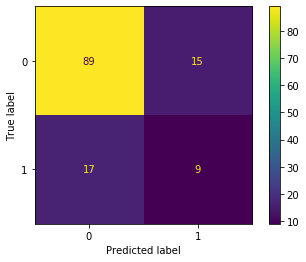

In [82]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_test)

cm_display = ConfusionMatrixDisplay(cm).plot()